In [1]:
import pandas as pd
from pandas._libs.tslibs.timestamps import Timestamp
import datetime

In [2]:
clients = pd.read_csv('../datasets/clients.csv')
items = pd.read_csv('../datasets/items.csv')

In [3]:
clients

,client_id,name,gender,dob,email,phone,channel,first_contact,lat,lon,location_name,created_at
0,100000000,Santoshi Pujari,Other,2001-07-09,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,27.6745,85.3147,Pulchowk Rd,2020-09-01 19:11:43.636755
1,100000001,Samir Balmapaki,Male,1997-08-22,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,27.6741,85.3733,Gaththaghar Bus Stand,2020-09-01 17:54:27.179981
2,100000002,Jenis Dong,Male,2000-02-10,jenis.dong@fakeemail.com,9841982134,Other,browser,27.6959,85.3416,Kalki Pushpa Marg,2020-09-01 04:25:35.978793
3,100000003,Prapti Lingden,Female,2000-02-06,prapti.lingden@fakeemail.com,9841648216,Other,browser,27.6863,85.3183,School Of Creative Communications,2020-09-01 16:13:47.878862
4,100000004,Srijan Biswash,Male,1997-04-13,srijan.biswash@fakeemail.com,9841587182,Other,browser,27.7015,85.3484,Sumitra Villa,2020-09-01 05:38:37.874022
...,...,...,...,...,...,...,...,...,...,...,...,...
175641,100175641,Vivi Nandana,Female,1991-01-03,vivi.nandana@fakeemail.com,9841920492,Facebook/Ads,app,27.6922,85.3195,The British College,2021-08-31 03:12:13.256245
175642,100175642,Sunita Dhawal,Female,2007-09-20,sunita.dhawal@fakeemail.com,9841705164,Word of Mouth,browser,27.7056,85.3236,Dilli Bazaar Sadak,2021-08-31 21:38:40.187767
175643,100175643,Asutosh Ranzitkar,Male,1993-03-17,asutosh.ranzitkar@fakeemail.com,9841185822,Other,app,27.7131,85.3246,Bhagawati Marg,2021-08-31 21:50:01.828931
175644,100175644,Alina Tuldhar,Female,2003-11-10,alina.tuldhar@fakeemail.com,9841091936,Word of Mouth,browser,27.7379,85.3628,Dhaulagiri Chowk Bus Stop,2021-08-31 10:20:17.775996


In [4]:
items

,item_id,item_name,category,image_url,inventory
0,10000,"Acer Aspire 3 (15.6″ HD, Ryzen 5 3500U, Radeon...",Laptop,https://dummyimage.com/600x400/000/fff&text=Ac...,46
1,10001,Mi 11X Pro (8+128GB),Phone,https://dummyimage.com/600x400/000/fff&text=Mi...,96
2,10002,Poco M3 (4+64GB),Phone,https://dummyimage.com/600x400/000/fff&text=Po...,67
3,10003,Galaxy F22 (4+64GB),Phone,https://dummyimage.com/600x400/000/fff&text=Ga...,10
4,10004,"ZenBook 14 UX435EG (14” FHD Touch, Intel i7-11...",Laptop,https://dummyimage.com/600x400/000/fff&text=Ze...,32
...,...,...,...,...,...
286,10286,"VivoBook Flip 14 TP412FA (14” FHD 360 Touch, I...",Laptop,https://dummyimage.com/600x400/000/fff&text=Vi...,20
287,10287,Nikon D810,Camera,https://dummyimage.com/600x400/000/fff&text=Ni...,79
288,10288,"Triton 300 2020 (15.6″ FHD 120Hz, Core i7-1075...",Laptop,https://dummyimage.com/600x400/000/fff&text=Tr...,23
289,10289,Galaxy M51 (6+128GB),Phone,https://dummyimage.com/600x400/000/fff&text=Ga...,37


## Add trend and seasonality

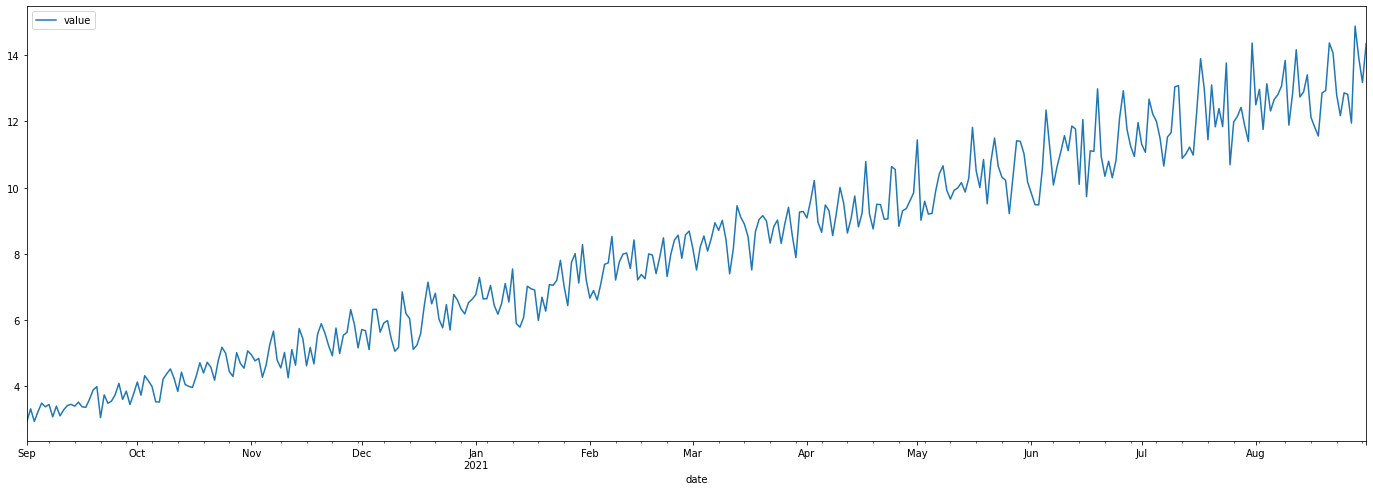

In [5]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor, HolidayFactor

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=10.0, offset=2., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.05, 5: 1.1, 6: 1.05}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [6]:
data = g.generate()

In [7]:
data['rows'] = (25*data.value).astype(int)

In [8]:
data = data[['date', 'rows']]

<AxesSubplot:xlabel='date'>

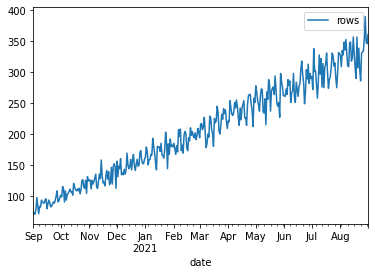

In [9]:
data.set_index('date').plot()

In [10]:
data

,date,rows
0,2020-09-01,74
1,2020-09-02,72
2,2020-09-03,70
3,2020-09-04,78
4,2020-09-05,97
...,...,...
360,2021-08-27,355
361,2021-08-28,390
362,2021-08-29,349
363,2021-08-30,346


In [ ]:
## holiday: dashain, christmas/new year, valentines day
## major promotion campain with sisan baniya, multiple tech channels, facebook promo etc
## 

In [11]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = num + 75
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = num + 50
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = num + 130
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 1.15)
    return num

In [12]:
data['rows'] = data.apply(nepali_holiday, axis=1)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_64921/2206892774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rows'] = data.apply(nepali_holiday, axis=1)


In [13]:
data

,date,rows
0,2020-09-01,74
1,2020-09-02,72
2,2020-09-03,70
3,2020-09-04,78
4,2020-09-05,97
...,...,...
360,2021-08-27,408
361,2021-08-28,448
362,2021-08-29,401
363,2021-08-30,397


In [14]:
data

,date,rows
0,2020-09-01,74
1,2020-09-02,72
2,2020-09-03,70
3,2020-09-04,78
4,2020-09-05,97
...,...,...
360,2021-08-27,408
361,2021-08-28,448
362,2021-08-29,401
363,2021-08-30,397
